# Tutorial 2 : using the `qmat.nodes` module

📜 _The_ `NodeGenerator` _class from_ `qmat.nodes` _allows to generate sets of quadrature nodes associated to various types of orthogonal polynomials._
_It is based on the book of W. Gautschi : [Orthogonal Polynomials: Computation and Approximation](https://doi.org/10.1093/oso/9780198506720.001.0001)._

Gauss quadrature approximate integrals by a given quadrature rule on $M$ points :

$$
\int_{-1}^{1} f(t)\omega(t)dt \simeq \sum_{m=1}^{M} \omega^M_m f(\tau^M_m)
$$

where $f(t)$ is a function of interest, $\omega(t)$ a weight function and $\tau^M_m, \omega^M_m$ are the **quadrature nodes and weights** 
associated to the Gauss quadrature on $M$ points. 
In particular, the quadrature nodes $\tau^M_m$ are the roots a given polynomial belonging to 
an orthogonal basis with respect to the scalar product :

$$
\langle p,q \rangle = \int_{-1}^{1} p(t)q(t) \omega(t)dt
$$

This polynomial basis is solely determined by the weights function $\omega(t)$, and classical polynomial basis exist already in the literature :

- $\omega(t) = 1$ : Legendre polynomials
- $\omega(t) = \frac{1}{\sqrt{1-t^2}}$ : Chebyshev polynomials of the 1st kind
- $\omega(t) = \sqrt{1-t^2}$ : Chebyshev polynomials of the 2nd kind
- $\omega(t) = \frac{\sqrt{1+t^2}}{\sqrt{1-t^2}}$ : Chebyshev polynomials of the 3rd kind
- $\omega(t) = \frac{\sqrt{1-t^2}}{\sqrt{1+t^2}}$ : Chebyshev polynomials of the 4th kind

## Node generation

The type of polynomial defines a **node type**, and the roots of the $M^{th}$ degree polynomial of this type are then the quadrature nodes $\tau^M_m$
and can be generated, _e.g_ for $M=4$ :

In [1]:
from qmat.nodes import NodesGenerator

gen = NodesGenerator(nodeType="LEGENDRE", quadType="GAUSS")
nodes = gen.getNodes(nNodes=4)
print(nodes)

[-0.86113631 -0.33998104  0.33998104  0.86113631]


💡 Note that those nodes symmetrically distributed, which is not necessarily the case for other types of nodes _e.g_ for the Chebyshev polynomials of the fourth kind :

In [2]:
gen = NodesGenerator(nodeType="CHEBY-4", quadType="GAUSS")
nodes = gen.getNodes(nNodes=4)
print(nodes)

[-0.93969262 -0.5         0.17364818  0.76604444]


Different types of nodes are available, checkout `qmat.nodes.NODE_TYPES` for the current list, in particular :

- `LEGENDRE` : for Legendre polynomials
- `CHEBY-1` : for the Chebyshev polynomials of the first kind
- `CHEBY-2` : ...

💡 You may noticed that those nodes are always **strictly included in** $[-1,1]$, hence usually named _Gauss points_.
But four specific **quadrature types** can be considered for each node type (_i.e_ for each polynomial basis) :

- `GAUSS` : nodes do not include $-1$ or $1$,
- `LOBATTO` : nodes include $-1$ and $1$,
- `RADAU-LEFT` : nodes include $-1$ (usually called Radau-I),
- `RADAU-RIGHT` : nodes include $1$ (usually called Radau-II).

The quadrature type is selected when instantiating the node generator, as for the node type :

In [3]:
gen = NodesGenerator(nodeType="LEGENDRE", quadType="LOBATTO")   # usually called Gauss-Lobatto in the literature
nodes = gen.getNodes(nNodes=4)
print(nodes)

[-1.        -0.4472136  0.4472136  1.       ]


In [4]:
gen = NodesGenerator(nodeType="CHEBY-3", quadType="RADAU-LEFT")
nodes = gen.getNodes(nNodes=4)
print(nodes)

[-1.         -0.42720716  0.36290645  0.92144357]


> 📣 We use the naming convention `RADAU-RIGHT` / `RADAU-LEFT` as it is more explicit than the usual one in the literature, 
> and also because Radau-I and Radau-II nodes are usually associated to the Legendre polynomials.

## Orthogonal polynomials

The node computation process relies on the **three term recurrence coefficients** associated to each polynomial basis :

$$
\begin{gather}
\forall j \in \mathbb{N}, \quad
\pi_{j+1}(t) = (t-\alpha_j)\pi_{j}(t) - \beta_j \pi_{j-1}(t), \\
\pi_{-1}(t) = 0, \quad \pi_0(t) = 1.
\end{gather}
$$

Those coefficients are know analytically for each polynomial basis (_i.e_ node type), 
and are used to generate the tri-diagonal Jacobi matrix for the weight function $\omega$

$$
J_\infty^{\omega} = \begin{bmatrix}
\alpha_0       & \sqrt{\beta_1} &                &                & \\
\sqrt{\beta_1} & \alpha_1       & \sqrt{\beta_2} &                & \\
               & \sqrt{\beta_2} & \alpha_2       & \sqrt{\beta_2} & \\
               &                & \ddots         & \ddots         & \ddots
\end{bmatrix}.
$$

Computing the eigenvalues of the leading principal sub-matrix of size $M$ allows to retrieve the `GAUSS` nodes,
and some small modifications of this sub-matrix allow to retrieve the `LOBATTO`, `RADAU-LEFT` and `RADAU-RIGHT` nodes.

But one can also use the orthogonal coefficients to evaluate the orthogonal polynomial of any degree, _e.g_ for $M=5$ :

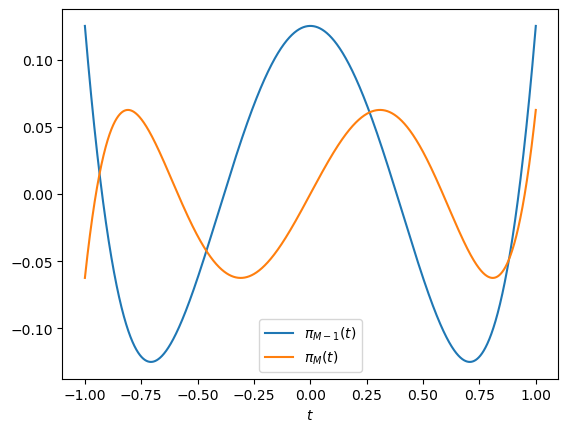

In [5]:
import numpy as np
import matplotlib.pyplot as plt

degree = 4

t = np.linspace(-1, 1, num=10000)

gen = NodesGenerator("CHEBY-1")
alpha, beta = gen.getOrthogPolyCoefficients(degree+1)

pi1, pi2 = gen.evalOrthogPoly(t, alpha, beta)

plt.plot(t, pi1, label=r"$\pi_{M-1}(t)$")
plt.plot(t, pi2, label=r"$\pi_{M}(t)$")
plt.legend(); plt.xlabel("$t$");

> 📣 Note that the `quadType` argument does not matter when generating orthogonal polynomials, and can simply be left to its default value.